# Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # For Visualization
import seaborn as sns # For Visualization
from sklearn.preprocessing import LabelEncoder # For Label Encoding


%matplotlib inline
import copy

# Read File

In [2]:
df=pd.read_csv("Predict Price of Airline Tickets.csv") # read .csv file

# Exploring The Data 

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.info() # Basic information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull().sum() # summation about the missing values of the data which tells as if there a missing data or not 


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
df=df.drop("Additional_Info",axis=1)

In [9]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,12648


In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [11]:
def number_stops(x):
    if x == 'non-stop':
        return 0 
    elif x == "1 stop":
        return 1
    elif x == "2 stops":
        return 2 
    elif x == "3 stops":
        return 3 
    elif x == "4 stops":
        return 4 
    

In [12]:
df["Total_Stops"]=df["Total_Stops"].apply(number_stops)

In [13]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,0,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,0,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,0,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,0,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,0,12648


In [14]:
pd.to_timedelta(df["Duration"]) # convert the column Duration to the format of time (hour:minute:seconds)

df['Total_Hours_Of_Journey'] =  df["Duration"] / pd.Timedelta(hours=1) # create New Column with the name of 'Total Hours' equal to the duration over the pandas function timedelta with the parameter hours=1 to show us the hours



In [15]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Total_Hours_Of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,0,3897,2.833333
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,7662,7.416667
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2,13882,19.000000
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1,6218,5.416667
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1,13302,4.750000
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,0,4107,2.500000
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,0,4145,2.583333
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,0,7229,3.000000
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,0,12648,2.666667


In [16]:
df["Date_of_Journey"] = df["Date_of_Journey"].apply(lambda x: pd.to_datetime(x))

df["Dep_Time"] = df["Dep_Time"].apply(lambda x: pd.to_datetime(x))

C:\Users\max\AppData\Local\Temp\ipykernel_756\365706082.py:1: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date_of_Journey"] = df["Date_of_Journey"].apply(lambda x: pd.to_datetime(x))
C:\Users\max\AppData\Local\Temp\ipykernel_756\365706082.py:1: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date_of_Journey"] = df["Date_of_Journey"].apply(lambda x: pd.to_datetime(x))
C:\Users\max\AppData\Local\Temp\ipykernel_756\365706082.py:1: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date_of_Journey"] = df["Date_of_Journey"].apply(lambda x: pd.to_datetime(x))
C:\Users\max\AppData\Local\Temp\ipykernel_756\365706082.py:1: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=

In [17]:
df["Departure_Hour"] = df["Dep_Time"].dt.hour

df["Day_of_Journey"] = df["Date_of_Journey"].dt.day

df["Month_of_Journey"] = df["Date_of_Journey"].dt.month




In [18]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Total_Hours_Of_Journey,Departure_Hour,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2022-07-11 22:20:00,01:10 22 Mar,2h 50m,0,3897,2.833333,22,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-07-11 05:50:00,13:15,7h 25m,2,7662,7.416667,5,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-07-11 09:25:00,04:25 10 Jun,19h,2,13882,19.000000,9,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,2022-07-11 18:05:00,23:30,5h 25m,1,6218,5.416667,18,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,2022-07-11 16:50:00,21:35,4h 45m,1,13302,4.750000,16,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU ? BLR,2022-07-11 19:55:00,22:25,2h 30m,0,4107,2.500000,19,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU ? BLR,2022-07-11 20:45:00,23:20,2h 35m,0,4145,2.583333,20,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR ? DEL,2022-07-11 08:20:00,11:20,3h,0,7229,3.000000,8,27,4
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR ? DEL,2022-07-11 11:30:00,14:10,2h 40m,0,12648,2.666667,11,3,1


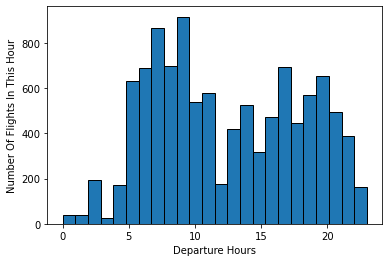

In [19]:
plt.hist(df["Departure_Hour"],edgecolor='black',bins=24)
plt.xlabel("Departure Hours")
plt.ylabel("Number Of Flights In This Hour")
plt.show()

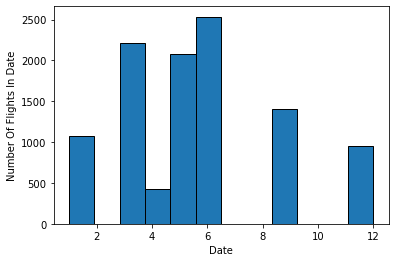

In [31]:
plt.hist(df["Month_of_Journey"],edgecolor='black',bins=12)
plt.xlabel("Date")
plt.ylabel("Number Of Flights In Date")
plt.show()

In [32]:
df.corr()

,Total_Stops,Price,Total_Hours_Of_Journey,Departure_Hour,Day_of_Journey,Month_of_Journey
Total_Stops,1.000000,0.603897,0.738071,-0.061476,-0.024136,0.065495
Price,0.603897,1.000000,0.506480,0.006799,-0.165448,0.010705
Total_Hours_Of_Journey,0.738071,0.506480,1.000000,0.002088,-0.038360,0.055136
Departure_Hour,-0.061476,0.006799,0.002088,1.000000,-0.002301,0.028189
Day_of_Journey,-0.024136,-0.165448,-0.038360,-0.002301,1.000000,-0.264896
Month_of_Journey,0.065495,0.010705,0.055136,0.028189,-0.264896,1.000000


<AxesSubplot:>

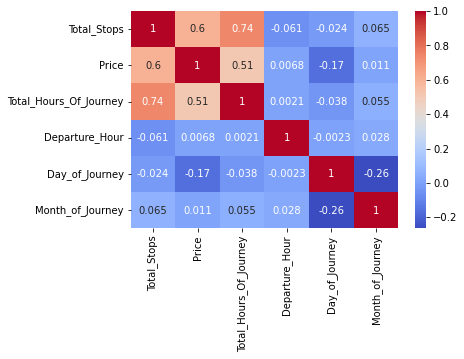

In [33]:
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

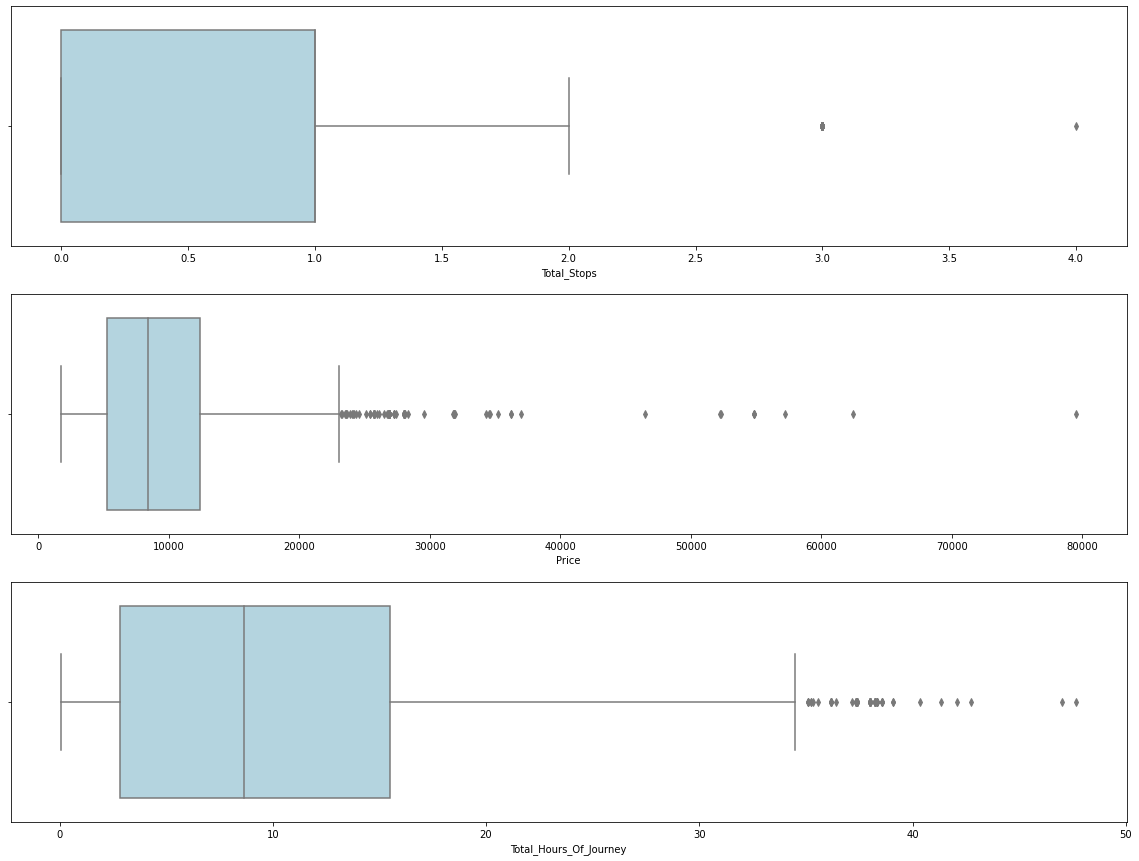

In [34]:
# Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.Total_Stops, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df.Price, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df.Total_Hours_Of_Journey, color='lightblue')

plt.show()

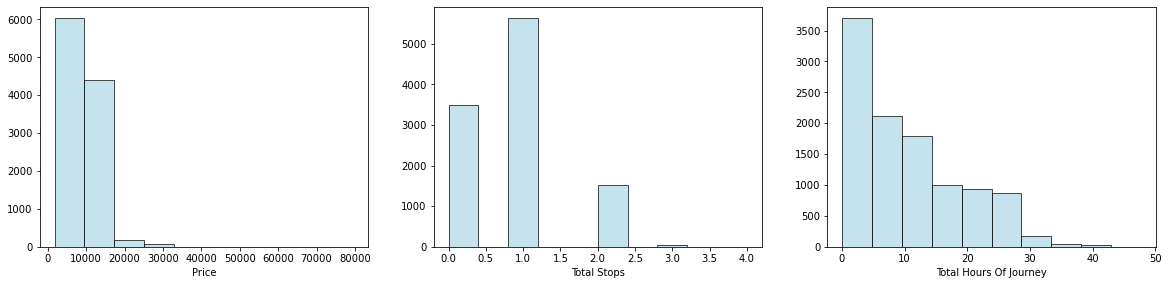

In [35]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.Price, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Price')

plt.subplot(3,3,2)
plt.hist(df.Total_Stops, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Total Stops')

plt.subplot(3,3,3)
plt.hist(df.Total_Hours_Of_Journey, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Total Hours Of Journey')

plt.show()

In [36]:
import scipy.stats as stats

# showing the skewness of variables
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.Price),stats.skew(df.Total_Stops),stats.skew(df.Total_Hours_Of_Journey)]},
                        index=['Price','Total Stops','Total Hours Of Journey'])  # Measure the skeweness of the required columns
Skewness

,Skewness
Price,1.812150
Total Stops,0.317064
Total Hours Of Journey,0.861290


C:\Users\max\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

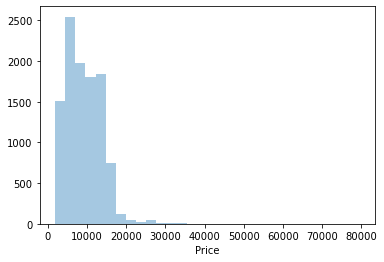

In [37]:
sns.distplot(df["Price"],kde=False,bins=30)

# Building Regression Model

In [262]:
# Split The Input and The Target
X = df.iloc[ : , [8,11]].values    # x --> features (Total Stops , Total Number Of Journey)
y = df.iloc[ : , 9 ].values          # y --> the column u want to predect [Price]

In [263]:
X

array([[ 0, 22],
       [ 2,  5],
       [ 2,  9],
       ...,
       [ 0,  8],
       [ 0, 11],
       [ 2, 10]], dtype=int64)

In [264]:
y

array([ 3897,  7662, 13882, ...,  7229, 12648, 11753], dtype=int64)

In [265]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split     #for ml models in python
# 1/3 test , 2/3 train ---> based on data size
#random_state ---> with any value // to get the same output بثبت ال
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/2, random_state = 0)

X_train

array([[ 1,  4],
       [ 2, 20],
       [ 0, 13],
       ...,
       [ 1,  8],
       [ 2, 13],
       [ 1, 20]], dtype=int64)

In [266]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  #implement the LinearRegression 
regressor.fit(X_train, y_train) #Train the model


LinearRegression()

In [267]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)  
y_pred

array([9871.38004142, 9645.11593016, 5822.23213991, ..., 5886.87902884,
       5628.29147312, 5725.26180652])

ValueError: x and y must be the same size

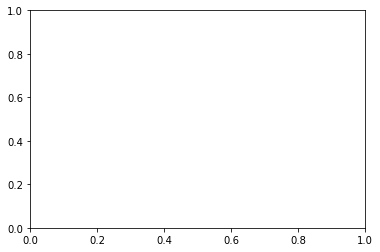

In [268]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Total (Training set)')
plt.xlabel('Total Number of Stops')
plt.ylabel('Price')
plt.show()

In [269]:
from sklearn import metrics # to evaluate any model
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_pred,y_test)) # r2_score=97% --> Accuracy for linear regression

MSE: 13538771.667025676
MAE: 2553.8061950563724
RMSE: 3679.5069869516046
r2_score: -0.7314831910542026
